<a href="https://colab.research.google.com/github/Suhanii054/DEEP-LEARNING/blob/main/LAB-3/LeNet_and_%20AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Pretrained models
from tensorflow.keras.applications import (
    VGG16, ResNet50, ResNet101,
    EfficientNetB0, InceptionV3, MobileNetV2
)

# Utilities
import numpy as np
import matplotlib.pyplot as plt
import time


In [ ]:
# -----------------------------
# Load CIFAR-10 dataset
# -----------------------------
# CIFAR-10 consists of 60,000 color images (32x32 RGB)
# belonging to 10 different object classes.
# 50,000 images are used for training and 10,000 for testing.

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# -----------------------------
# Normalize image pixel values
# -----------------------------
# Original pixel values are in the range [0, 255]
# Neural networks train better when inputs are small,
# so we scale them to the range [0, 1]

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# -----------------------------
# Convert class labels to one-hot encoding
# -----------------------------
# Example:
# class '3'  →  [0 0 0 1 0 0 0 0 0 0]
# Required for categorical crossentropy loss

y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

# -----------------------------
# Print dataset information
# -----------------------------
print("Training data shape :", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape     :", x_test.shape)
print("Test labels shape   :", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape : (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape     : (10000, 32, 32, 3)
Test labels shape   : (10000, 10)


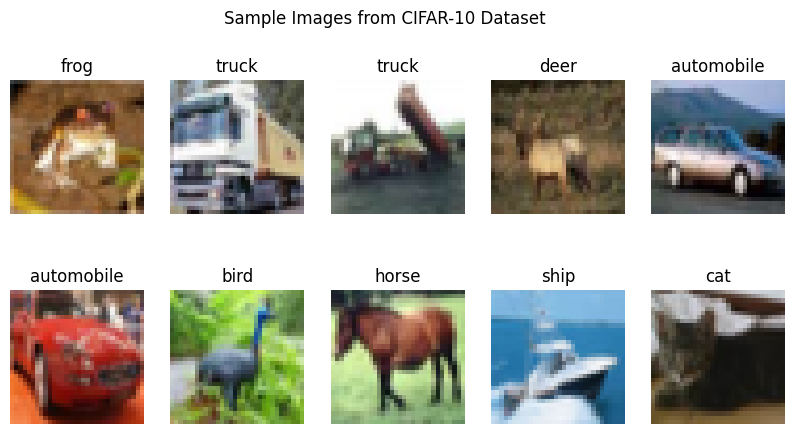

In [ ]:
# -----------------------------
# CIFAR-10 class names
# -----------------------------
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# -----------------------------
# Display a few training images
# -----------------------------
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis("off")

plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.show()


In [ ]:
def train_and_evaluate(model, model_name, epochs=5):
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    start_time = time.time()

    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=64,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    training_time = time.time() - start_time

    print(f"\n{model_name} Test Accuracy: {test_acc:.4f}")
    print(f"{model_name} Training Time: {training_time:.2f} seconds")

    return test_acc, training_time


In [ ]:
def build_lenet():
    model = models.Sequential([
        # Explicit input layer (recommended in Keras 3)
        layers.Input(shape=(32, 32, 3)),

        # First convolution layer
        layers.Conv2D(6, (5, 5), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),

        # Second convolution layer
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


# Build and train LeNet-5
lenet = build_lenet()
lenet_acc, lenet_time = train_and_evaluate(lenet, "LeNet-5")


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.3131 - loss: 1.8711 - val_accuracy: 0.4366 - val_loss: 1.5607
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.4679 - loss: 1.4704 - val_accuracy: 0.5250 - val_loss: 1.3306
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.5223 - loss: 1.3305 - val_accuracy: 0.5222 - val_loss: 1.3593
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5491 - loss: 1.2654 - val_accuracy: 0.5626 - val_loss: 1.2413
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.5746 - loss: 1.1862 - val_accuracy: 0.5464 - val_loss: 1.2826

LeNet-5 Test Accuracy: 0.5396
LeNet-5 Training Time: 161.92 seconds


In [ ]:
def build_alexnet():
    model = models.Sequential([
        # Input layer (Keras 3 recommended)
        layers.Input(shape=(32, 32, 3)),

        # Conv Block 1
        layers.Conv2D(96, (3, 3), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Conv Block 2
        layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Conv Block 3
        layers.Conv2D(384, (3, 3), padding="same", activation='relu'),
        layers.Conv2D(384, (3, 3), padding="same", activation='relu'),
        layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),   # reduced from 4096 (CIFAR-10)
        layers.Dense(1024, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


alexnet = build_alexnet()
alex_acc, alex_time = train_and_evaluate(alexnet, "AlexNet")


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1501s 2s/step - accuracy: 0.2655 - loss: 1.9225 - val_accuracy: 0.4890 - val_loss: 1.3958
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1477s 2s/step - accuracy: 0.5588 - loss: 1.2126 - val_accuracy: 0.6116 - val_loss: 1.0884
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1475s 2s/step - accuracy: 0.6617 - loss: 0.9464 - val_accuracy: 0.7018 - val_loss: 0.8488
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1470s 2s/step - accuracy: 0.7227 - loss: 0.7780 - val_accuracy: 0.7266 - val_loss: 0.7902
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 1471s 2s/step - accuracy: 0.7707 - loss: 0.6471 - val_accuracy: 0.7514 - val_loss: 0.7387

AlexNet Test Accuracy: 0.7445
AlexNet Training Time: 7538.82 seconds
